# MOV 프레임 변환 워크플로

이 노트북은 동일한 폴더에 있는 `MOV` 영상 파일을 프레임 이미지로 추출하고, 사용자가 지정한 해상도와 확장자로 변환하여 저장하기 위한 예제입니다.
모든 주석과 안내는 한국어로 작성되어 있으며, ffmpeg를 활용하여 이미지 압축을 수행합니다.

In [1]:
from pathlib import Path
from typing import List, Tuple
import subprocess
from IPython.display import Image, display

# ffmpeg 실행 시 사용할 기본 압축 옵션을 확장자별로 정의합니다.
DEFAULT_COMPRESS_MAP = {
    "jpg": ["-q:v", "4"],  # 1에 가까울수록 고화질, 숫자가 커질수록 고압축
    "jpeg": ["-q:v", "4"],
    "png": ["-compression_level", "9"],  # 0~9 범위로 9가 최대 압축
    "webp": ["-q:v", "80"],  # 0~100 범위로 숫자가 클수록 고화질
}


In [2]:
def convert_mov_frames(
    input_dir: Path,
    output_dir: Path,
    size: Tuple[int, int],
    extension: str,
    overwrite: bool = True,
) -> List[Path]:
    """MOV 영상을 프레임 이미지로 변환하고 지정한 해상도와 확장자로 저장합니다."""
    # 입력 폴더가 존재하는지 우선 확인합니다.
    if not input_dir.exists():
        raise FileNotFoundError(f"입력 폴더를 찾을 수 없습니다: {input_dir}")
    if not input_dir.is_dir():
        raise NotADirectoryError(f"입력 경로가 폴더가 아닙니다: {input_dir}")

    # 사용자가 입력한 해상도가 유효한지 검사합니다.
    width, height = size
    if width <= 0 or height <= 0:
        raise ValueError("해상도는 0보다 큰 양수여야 합니다.")

    # 지원하는 확장자인지 확인하고 문자열을 정규화합니다.
    normalized_ext = extension.lower().lstrip(".")
    if normalized_ext not in DEFAULT_COMPRESS_MAP:
        raise ValueError(f"지원하지 않는 확장자입니다: {normalized_ext}")

    # 출력 폴더를 미리 준비합니다.
    output_dir.mkdir(parents=True, exist_ok=True)

    # 현재 폴더에서 MOV 파일을 찾습니다 (대소문자 모두 지원).
    mov_files = sorted(input_dir.glob("*.mov")) + sorted(input_dir.glob("*.MOV"))
    if not mov_files:
        print("변환할 MOV 파일을 찾지 못했습니다.")
        return []

    created_files: List[Path] = []

    for mov_path in mov_files:
        print(f"처리 중: {mov_path.name}")

        # 영상 파일별로 결과를 분리하여 저장할 하위 폴더를 준비합니다.
        target_subdir = output_dir / mov_path.stem
        target_subdir.mkdir(parents=True, exist_ok=True)

        # 저장될 이미지 이름 패턴을 정의합니다.
        output_pattern = target_subdir / f"{mov_path.stem}_%06d.{normalized_ext}"

        # ffmpeg 명령어를 구성합니다.
        command = [
            "ffmpeg",
            "-hide_banner",
            "-loglevel",
            "error",
        ]
        command.append("-y" if overwrite else "-n")
        command += [
            "-i",
            str(mov_path),
            "-vf",
            f"scale={width}:{height}:flags=lanczos",
        ]
        command += DEFAULT_COMPRESS_MAP.get(normalized_ext, [])
        command.append(str(output_pattern))

        # ffmpeg를 실행하여 프레임을 이미지로 추출합니다.
        result = subprocess.run(command, capture_output=True, text=True)
        if result.returncode != 0:
            raise RuntimeError(
                f"ffmpeg 실행에 실패했습니다: {mov_path.name}\n{result.stderr.strip()}"
            )

        # 생성된 이미지를 정렬하여 리스트에 누적합니다.
        new_frames = sorted(target_subdir.glob(f"{mov_path.stem}_*.{normalized_ext}"))
        print(f"  생성된 프레임 수: {len(new_frames)}")
        created_files.extend(new_frames)

    return created_files


MOV 파일이 있는 폴더 경로 (기본값: 현재 폴더):  
이미지를 저장할 폴더 경로 (기본값: ./converted_frames):  
출력 이미지의 가로 해상도 x 값을 입력하세요:  960
출력 이미지의 세로 해상도 y 값을 입력하세요:  544
저장할 이미지 확장자를 입력하세요 (예: jpg, png, webp):  jpg


처리 중: IMG_6148.MOV
  생성된 프레임 수: 358
처리 중: IMG_6149.MOV
  생성된 프레임 수: 1191
처리 중: IMG_6157.MOV
  생성된 프레임 수: 98
처리 중: IMG_6158.MOV
  생성된 프레임 수: 56
처리 중: IMG_6159.MOV
  생성된 프레임 수: 324
처리 중: IMG_6160.MOV
  생성된 프레임 수: 251
처리 중: IMG_6161.MOV
  생성된 프레임 수: 289
처리 중: IMG_6162.MOV
  생성된 프레임 수: 309
처리 중: IMG_6163.MOV
  생성된 프레임 수: 127
총 3003개의 이미지가 생성되었습니다.
미리보기: /Users/jipibe.j/jiwon-project/nvidia-work/GenerativeAIExamples/vision_workflows/metropolis-nim-workflows/nim_workflows/nvdinov2_few_shot/videos/converted_frames/IMG_6148/IMG_6148_000001.jpg


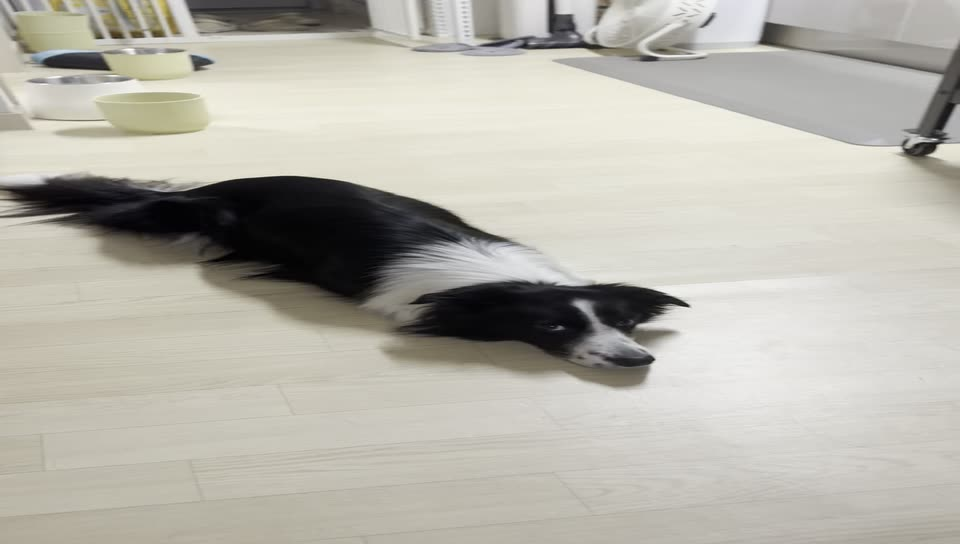

미리보기: /Users/jipibe.j/jiwon-project/nvidia-work/GenerativeAIExamples/vision_workflows/metropolis-nim-workflows/nim_workflows/nvdinov2_few_shot/videos/converted_frames/IMG_6148/IMG_6148_000002.jpg


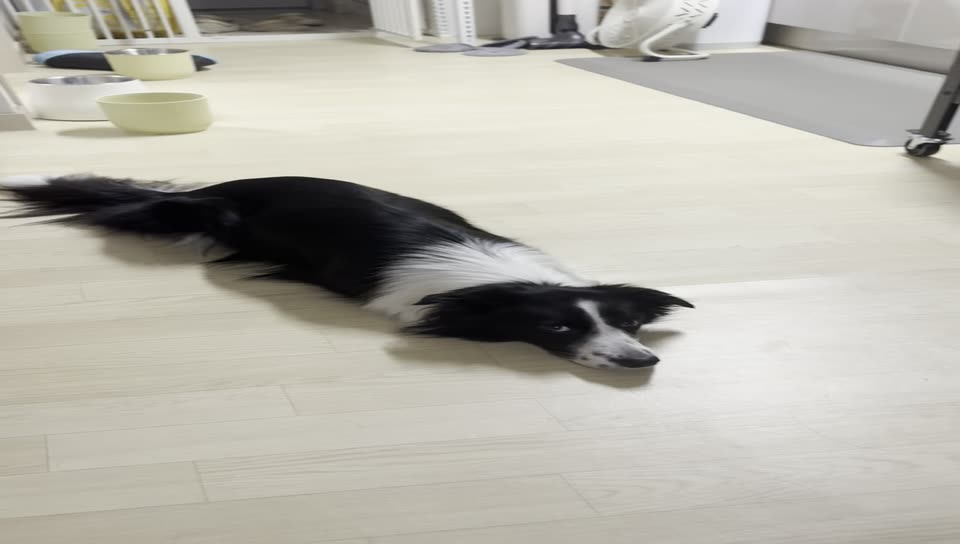

미리보기: /Users/jipibe.j/jiwon-project/nvidia-work/GenerativeAIExamples/vision_workflows/metropolis-nim-workflows/nim_workflows/nvdinov2_few_shot/videos/converted_frames/IMG_6148/IMG_6148_000003.jpg


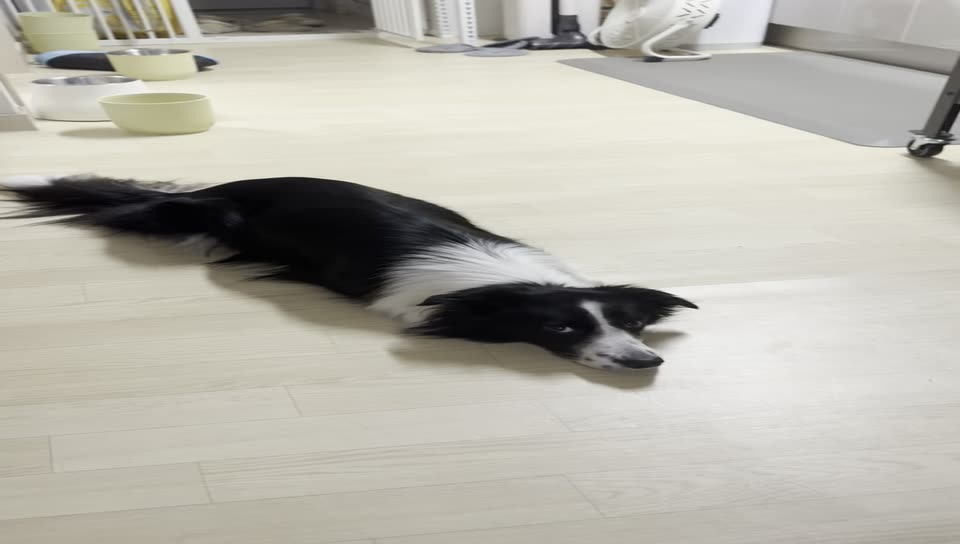

In [3]:
# 사용자 입력을 받아 변환 작업을 실행합니다.
try:
    # 기본 경로와 옵션을 입력받습니다.
    input_dir_text = input("MOV 파일이 있는 폴더 경로 (기본값: 현재 폴더): ").strip()
    output_dir_text = input("이미지를 저장할 폴더 경로 (기본값: ./converted_frames): ").strip()
    width_text = input("출력 이미지의 가로 해상도 x 값을 입력하세요: ").strip()
    height_text = input("출력 이미지의 세로 해상도 y 값을 입력하세요: ").strip()
    ext_text = input("저장할 이미지 확장자를 입력하세요 (예: jpg, png, webp): ").strip()

    # 입력값을 경로 및 정수로 변환합니다.
    input_dir = Path(input_dir_text) if input_dir_text else Path.cwd()
    output_dir = (
        Path(output_dir_text)
        if output_dir_text
        else Path.cwd() / "converted_frames"
    )
    width = int(width_text)
    height = int(height_text)

    # 변환을 실행하고 결과를 출력합니다.
    generated = convert_mov_frames(
        input_dir,
        output_dir,
        (width, height),
        ext_text,
        overwrite=True,
    )

    print(f"총 {len(generated)}개의 이미지가 생성되었습니다.")

    # 앞부분 몇 개의 결과를 미리보기로 출력합니다.
    for preview_path in generated[:3]:
        print(f"미리보기: {preview_path}")
        try:
            display(Image(filename=str(preview_path)))
        except Exception:
            # IPython 환경이 아닐 때를 대비한 예외 처리입니다.
            pass
except Exception as exc:
    print(f"오류가 발생했습니다: {exc}")
